# Import the Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import the dataset

In [2]:
data=pd.read_csv("Admission_Predict.csv")


In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

# HANDLING MISSING VALUES

In [5]:
data.isnull

<bound method DataFrame.isnull of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Ch

In [6]:
data.info

<bound method DataFrame.info of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Chan

# DATA VISUALIZATION

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

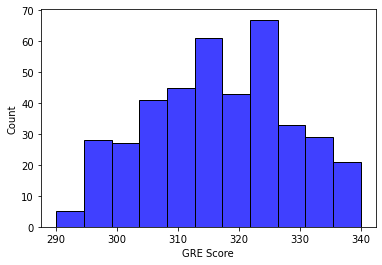

In [7]:
sns.histplot(data["GRE Score"],color='blue')

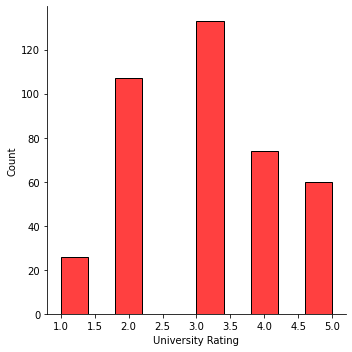

In [8]:
sns.displot(data["University Rating"],color='red') 

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score', ylabel='University Rating'>

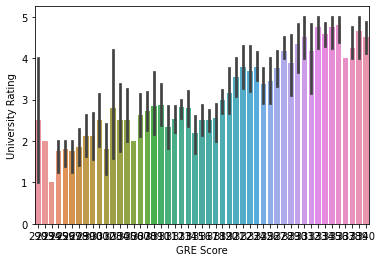

In [9]:
sns.barplot(data["GRE Score"],data["University Rating"])

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score'>

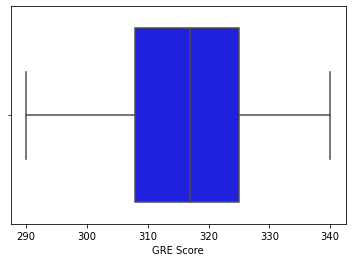

In [10]:
sns.boxplot(data["GRE Score"],color='blue')

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GRE Score', ylabel='University Rating'>

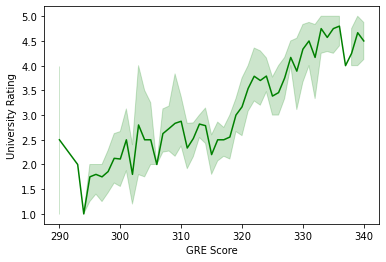

In [11]:
sns.lineplot(data["GRE Score"],data["University Rating"], color='green')

# SPLITING DEPENDENT AND INDEPENDENT COLUMNS

In [12]:
y = data["GRE Score"]
y.head()

0    337
1    324
2    316
3    322
4    314
Name: GRE Score, dtype: int64

In [13]:
x=data.drop(columns=["University Rating"],axis=1)
x.head()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4.5,4.5,9.65,1,0.92
1,2,324,107,4.0,4.5,8.87,1,0.76
2,3,316,104,3.0,3.5,8.00,1,0.72
3,4,322,110,3.5,2.5,8.67,1,0.80
4,5,314,103,2.0,3.0,8.21,0,0.65


In [14]:
from sklearn.preprocessing import scale
X_Scaled = pd.DataFrame(scale(x), columns=x.columns)
X_Scaled.head()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
0,-1.727726,1.762107,1.746971,1.093864,1.167321,1.764818,0.909112,1.373648
1,-1.719066,0.627656,-0.067635,0.596653,1.167321,0.455151,0.909112,0.250297
2,-1.710406,-0.070467,-0.562528,-0.397769,0.052933,-1.005631,0.909112,-0.030541
3,-1.701745,0.453126,0.427257,0.099442,-1.061454,0.119339,0.909112,0.531135
4,-1.693085,-0.244998,-0.727492,-1.392191,-0.504260,-0.653029,-1.099975,-0.522007


# SPLITTING THE DATA INTO TRAIN AND TEST

In [15]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Scaled, y, test_size=0.2, random_state=0)


In [16]:
X_Train.shape,X_Test.shape

((320, 8), (80, 8))

In [17]:
Y_Train.shape,Y_Test.shape


((320,), (80,))

In [18]:
X_Train.head()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
336,1.182128,0.191329,0.427257,-0.397769,-1.061454,0.320826,-1.099975,-0.030541
64,-1.173468,0.714922,0.592221,-0.397769,0.052933,0.169711,-1.099975,-1.434730
55,-1.251411,0.278595,-0.727492,-0.397769,-0.504260,-1.509349,-1.099975,-0.592217
106,-0.809736,1.063983,0.592221,1.093864,1.167321,0.975660,0.909112,1.022601
300,0.870358,-0.681325,-0.232599,-0.894980,-1.061454,-1.005631,-1.099975,-0.732636


In [19]:
X_Test.head()

,Serial No.,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
132,-0.584569,-0.681325,-0.397564,0.099442,0.052933,-0.065357,-1.099975,-0.100751
309,0.948301,-0.768590,0.427257,0.099442,-0.504260,0.001805,-1.099975,-0.170960
341,1.225430,0.802187,0.427257,0.099442,0.052933,0.270455,0.909112,0.460925
196,-0.030311,-0.943121,-0.397564,-0.397769,-1.061454,-0.569076,-1.099975,0.039668
246,0.402703,-0.070467,-0.397564,-0.397769,0.052933,0.220083,-1.099975,-0.030541


In [20]:
Y_Train.head()

336    319
64     325
55     320
106    329
300    309
Name: GRE Score, dtype: int64

In [21]:
Y_Test.head()

132    309
309    308
341    326
196    306
246    316
Name: GRE Score, dtype: int64

# MODEL BUILDING

In [22]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,criterion='entropy')


In [23]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [24]:
y_predict = model.predict(X_Test)
y_predict_train = model.predict(X_Train)

# TRAINING AND TESTING THE MODEL

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
print('Training accuracy: ',accuracy_score(Y_Train,y_predict_train))

Training accuracy:  0.99375


In [27]:
print('Testing accuracy: ',accuracy_score(Y_Test,y_predict))

Testing accuracy:  0.275


# MODEL EVALUATION

In [28]:
pd.crosstab(Y_Test,y_predict)

col_0,293,294,296,297,299,300,303,304,305,306,...,325,326,327,328,330,331,334,335,336,340
GRE Score,,,,,,,,,,,,,,,,,,,,,
294,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
295,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
301,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
302,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
306,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
print(classification_report(Y_Test,y_predict))

              precision    recall  f1-score   support

         293       0.00      0.00      0.00         0
         294       0.00      0.00      0.00         1
         295       0.00      0.00      0.00         1
         296       0.50      0.50      0.50         2
         297       0.00      0.00      0.00         2
         299       0.00      0.00      0.00         0
         300       0.00      0.00      0.00         1
         301       0.00      0.00      0.00         2
         302       0.00      0.00      0.00         1
         303       0.00      0.00      0.00         0
         304       0.00      0.00      0.00         1
         305       0.00      0.00      0.00         0
         306       0.00      0.00      0.00         3
         307       0.00      0.00      0.00         2
         308       0.50      0.50      0.50         2
         309       0.00      0.00      0.00         2
         310       0.00      0.00      0.00         0
         311       1.00    

E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall 